# Exercise 5 Problem 1

## Interactive map

In this problem, we are going to visualize an interactive map showing the locations of major train and metro stations together with housing production data in the Helsinki region (housing production initiated between 2016 and 2019). The visualization will be on two layers, allowing the user to choose between subsidised and non-subsidised production on two heat maps. Train and metro stations are visualized with a 400 meter radius, representing a typical walking distance to public transport stops.

In [1]:
# Import necessary modules
import geopandas as gpd
from pyproj import CRS
import requests
import geojson
import matplotlib.pyplot as plt


In [2]:
# Specify filepath for HSL stops shapefile
fp_HSL = r"data/xn--HSL_n_pyskit-ocb.shp"

In [3]:
# Read HSL stops file
stops = gpd.read_file(fp_HSL)

In [4]:
# Select only train and metro stations
stops = stops.loc[stops['VERKKO'].isin([2, 4])]

# Select only stations in active use
stops = stops.loc[stops['REI_VOIM'] == 1]

In [5]:
# Drop duplicate entries from stations list
stops = stops.drop_duplicates(subset = "NAMN1", keep = "first")

In [6]:
# Reset index
stops.reset_index(drop=True, inplace=True)

In [7]:
# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:alkaneetasunnotmal2016_2019', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
housing = gpd.GeoDataFrame.from_features(geojson.loads(r.content), crs="EPSG:3879")

In [8]:
# Check datq
stops.tail(50)

,FID,SOLMUTUNNU,LYHYTTUNNU,SOLMUTYYPP,X,Y,PROJ_X,PROJ_Y,NIMI1,NAMN1,NIMI2,NAMN2,REI_VOIM,AIK_VOIM,VERKKO,PYSAKKITYY,geometry
38,5563,2161501,E1606,P,2539159,6677478,2539159,6677472,Koivuhovi,Björkgård,Ullanmäentie 2,Ullasbackavägen 2,1,1,4,03,POINT (24.70298 60.20695)
39,5609,2211601,E0005,P,2544773,6673983,2544773,6673965,Tapiola,Hagalund,Merituulentie 1,HHavsvindsvägen 1,1,1,2,99,POINT (24.80345 60.17501)
40,5702,2214601,E0007,P,2543503,6673920,2543504,6673907,Urheilupuisto,Idrottsparken,Joutsenpuistonkatu 2,Bågparksgatan 2,1,1,2,99,POINT (24.78055 60.17458)
41,5704,2214603,E0009,P,2542548,6673453,2542551,6673439,Niittykumpu,Ängskulla,Niittykatu 2,Ängsgatan 2,1,1,2,99,POINT (24.76325 60.17049)
42,5788,2222601,E0001,P,2546210,6674044,2546200,6674054,Keilaniemi,Kägeludden,Keilaniementie 3,Kägeluddsvägen 3,1,1,2,99,POINT (24.82935 60.17540)
43,5790,2222603,E0003,P,2545873,6675055,2545874,6675041,Aalto-yliopisto,Aalto-universitetet,Otaniementie 12,Otnäsvägen 12,1,1,2,99,POINT (24.82350 60.18451)
44,6024,2314601,E0011,P,2541240,6672245,2541246,6672234,Matinkylä,Mattby,Suomenlahdentie 1,Finnviksvägen 1,1,1,2,99,POINT (24.73945 60.15979)
45,6580,2511501,E5141,P,2533454,6675451,2533459,6675445,Kauklahti,Köklax,Hansatie 3,Hansavägen 3,1,1,4,03,POINT (24.59977 60.18927)
46,6706,2611502,E6038,P,2536576,6677250,2536580,6677243,Espoo,Esbo,Espoonsilta,Esbobro,1,1,4,03,POINT (24.65636 60.20515)
47,6731,2612501,E6059,P,2537961,6677371,2538014,6677376,Tuomarila,Domsby,Tuomarilantie 4,Domsbyvägen 4,1,1,4,04,POINT (24.68136 60.20611)


In [9]:
# Redefine data using indexing. Correct indices checked manually from above list (Helsinki, Espoo, Kauniainen and Vantaa stations are numbered 0-62)
stops = stops[0:63]

<AxesSubplot:>

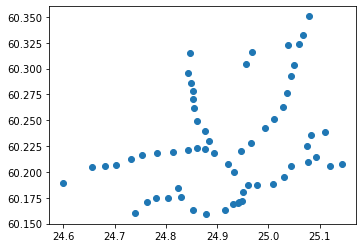

In [10]:
# Plot the data for visual check
stops.plot()

In [11]:
# Choosing only apartment housing types from correct cities
housing = housing.loc[housing['Talotyyppi'] == "AK"]
housing = housing.loc[housing['Sijaintikunta'].isin(['Vantaa', 'Helsinki', 'Espoo', 'Kauniainen'])]

In [12]:
# Reproject the data
housing = housing.to_crs(epsg=4326)

In [13]:
# Verify that CRS:s are same
stops.crs==housing.crs

True

In [14]:
# Import modules
import folium
from folium.plugins import MarkerCluster

In [15]:
# Create dataframes for subsidised and non-subsidised housing
housing_other = housing.loc[housing['Rahoitusmuoto'] != "VO"]
housing_free = housing.loc[housing['Rahoitusmuoto'] == "VO"]

In [16]:
# Get x and y coordinates for each point

# Create empty lists for subsidised and non-subsidised points
locations_free=[]
locations_other=[]

# Iterate through rows
for i, row in housing_free.iterrows():
    
    # Collect multipoint object from dataframe into multipoint variable
    multipoint = housing_free.at[i, "geometry"]
    
    # Convert multipoint object into tuple object
    point = multipoint[0].y, multipoint[0].x
    
    # Append into location list
    locations_free.append(point)

# Same as above
for i, row in housing_other.iterrows():
    multipoint = housing_other.at[i, "geometry"]
    point = multipoint[0].y, multipoint[0].x
    locations_other.append(point)    


In [17]:
# Import HeatMap
from folium.plugins import HeatMap

# Create a Map instance
m = folium.Map(location=[60.25, 24.8], name="Base map", tiles = 'Stamen Terrain', zoom_start=10, control_scale=True)

# Define title
title = 'Housing production in the Helsinki metropolitan area 2016-2019'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(title)   

# Add heatmap for non-subsidised housing
HeatMap(locations_free, name="Non-subsidised housing production").add_to(m)

# Add heatmap for subsidised housing
HeatMap(locations_other, name="Subsidised housing production").add_to(m)

# Add train and metro stops to map instance using loop
for i, row in stops.iterrows():
    
    # In each loop, add one circle with a radius of 400 meters into map instance
    folium.Circle(
        # Dedine radius
        radius=400,
        # Define location
        location=(stops.at[i, "geometry"].y, stops.at[i, "geometry"].x),
        # Define interactive popup column
        tooltip=stops.at[i, "NIMI1"],
        color='black',
        fill=True,
    ).add_to(m)

# Add layer control to interactive selection
folium.LayerControl().add_to(m)

# Add title
m.get_root().html.add_child(folium.Element(title_html))

# Show map
m

In [18]:
# Save output
outfp = "housing_map.html"
m.save(outfp)